In [36]:
import pandas as pd

root = "../../"
df = pd.read_csv(root + "data/covid19_usa.csv", sep=",")
df["date"] = pd.to_datetime(df["date"])
df.head()

,id,date,FIPS,lat,lon,state,abbr,location,cases,death
0,NY0000000,2020-06-22,36103.0,40.883201,-72.801217,New York,NY,Suffolk,41010,1965
1,NY0000001,2020-06-22,36105.0,41.715795,-74.763946,New York,NY,Sullivan,1438,45
2,NC0000002,2020-06-22,37133.0,34.726074,-77.429082,North Carolina,NC,Onslow,221,3
3,ND0000003,2020-06-22,38001.0,46.096869,-102.528540,North Dakota,ND,Adams,0,0
4,OH0000004,2020-06-22,39063.0,41.002505,-83.668389,Ohio,OH,Hancock,63,5


In [37]:
df["date"].describe()

count                          2338190
mean     2021-02-28 12:00:00.000000768
min                2020-03-01 00:00:00
25%                2020-08-30 00:00:00
50%                2021-02-28 12:00:00
75%                2021-08-30 00:00:00
max                2022-02-28 00:00:00
Name: date, dtype: object

In [38]:
total_death = df["death"].sum()
total_death

315026762

***300++ million death?? looks like there is some error in the data***

In [39]:
# get sample cell
df.head(1)

,id,date,FIPS,lat,lon,state,abbr,location,cases,death
0,NY0000000,2020-06-22,36103.0,40.883201,-72.801217,New York,NY,Suffolk,41010,1965


### we will focus on NY at Suffolk county

In [40]:
data = df[(df["location"] == "Suffolk") & (df["abbr"] == "NY")]
data = data.sort_values(by="date")
data.drop(["FIPS", "location", "state", "lat", "lon"], axis=1, inplace=True)
data.set_index("id", inplace=True)
data.head()

,date,abbr,cases,death
id,,,,
NY1458550,2020-03-01,NY,0,0
NY1340626,2020-03-02,NY,0,0
NY0052874,2020-03-03,NY,0,0
NY0522304,2020-03-04,NY,0,0
NY0976598,2020-03-05,NY,0,0


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

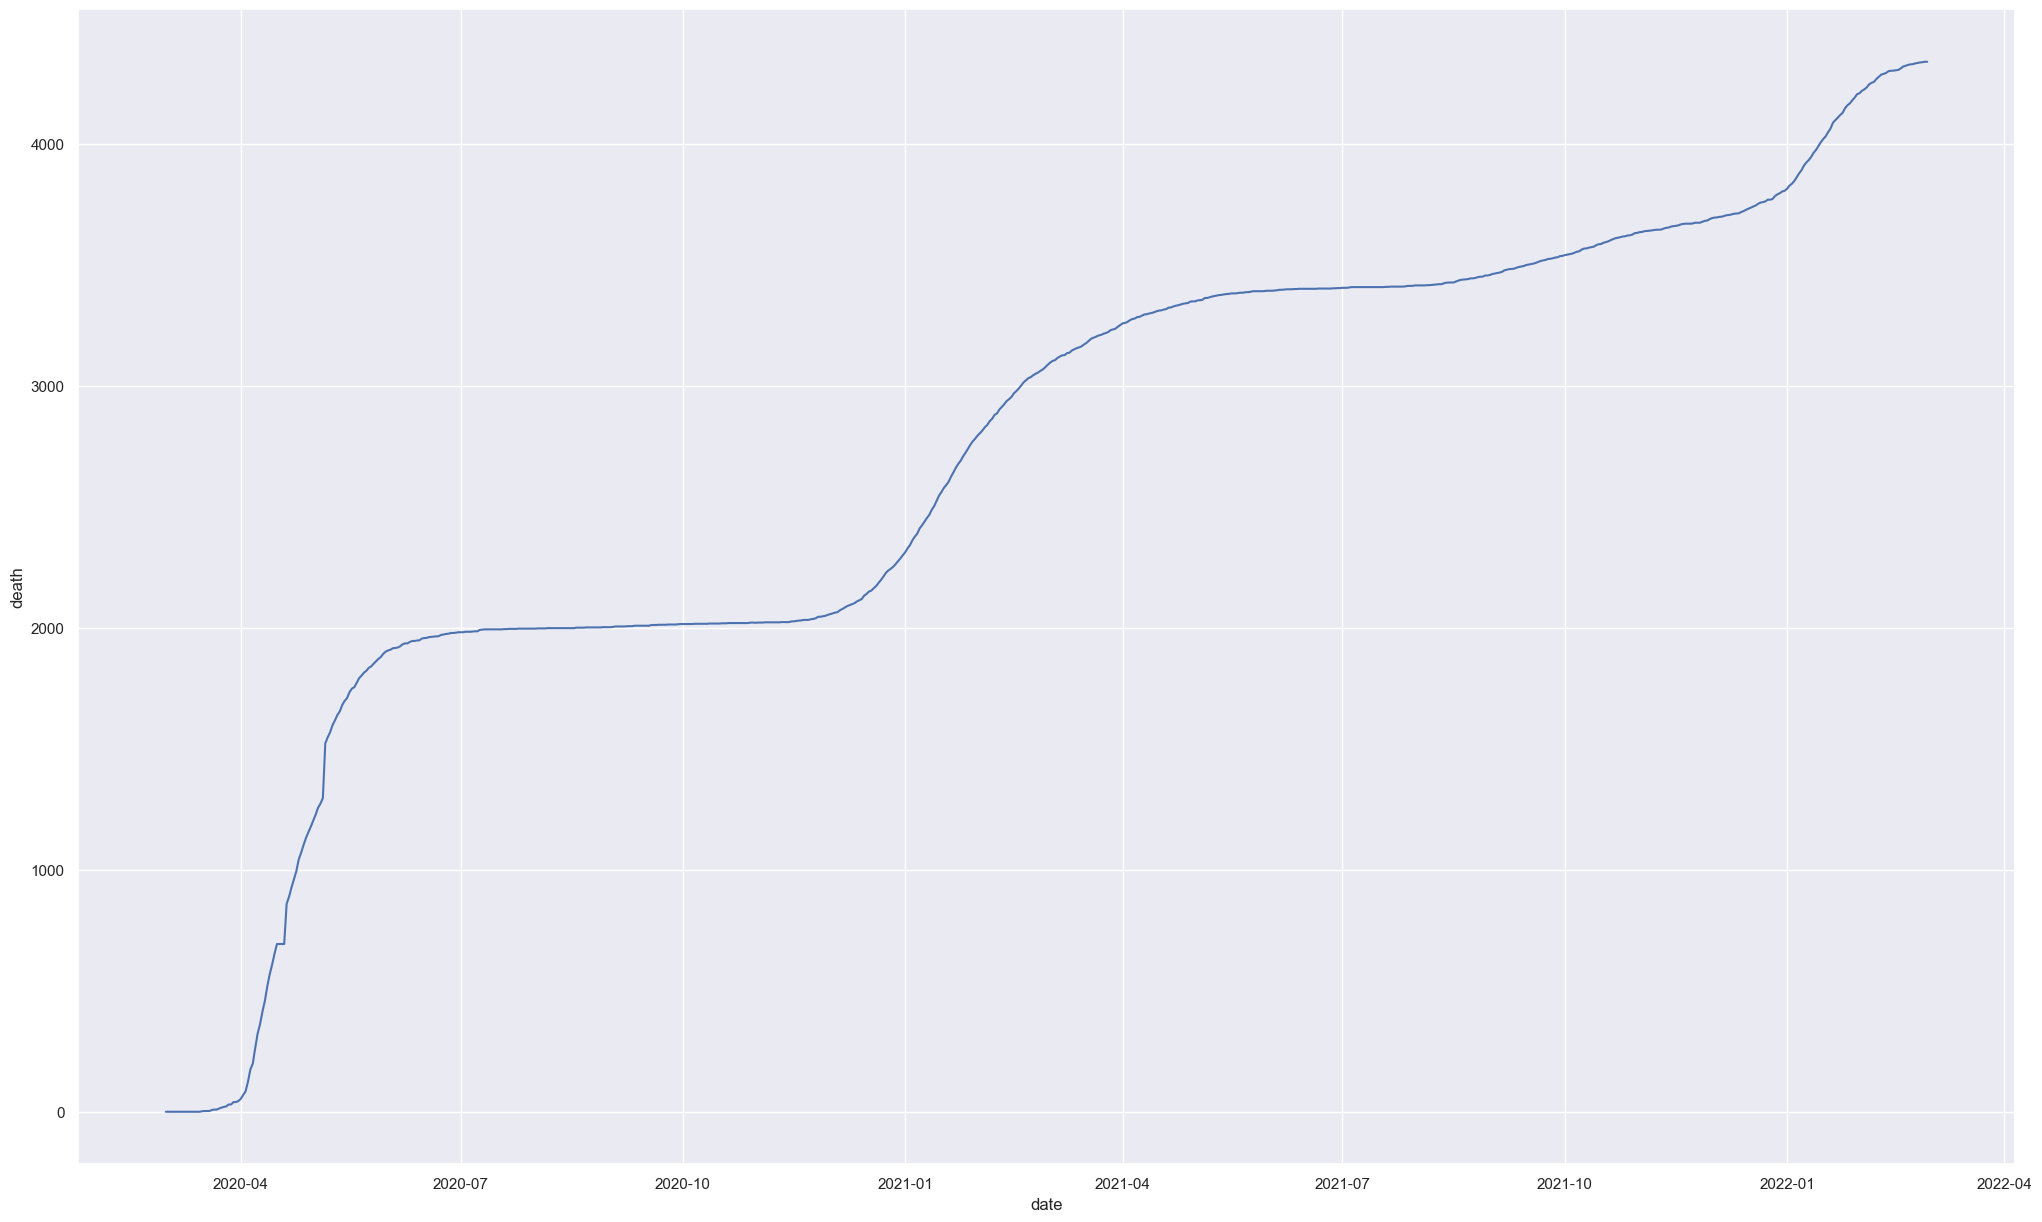

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(25, 15))
sns.lineplot(x="date", y="death", data=data)
plt.show()

***note***: this plot is from all record

In [56]:
data = data.groupby("date").sum()

# plot differential
data["cases_diff"] = data["cases"].diff()
data["death_diff"] = data["death"].diff()

data.drop(["state", "abbr", "location", "season"], axis=1, inplace=True)
data.head()

,cases,death,cases_diff,death_diff
date,,,,
2020-03-01,39,2,NaN,NaN
2020-03-02,57,7,18.0,5.0
2020-03-03,79,8,22.0,1.0
2020-03-04,113,12,34.0,4.0
2020-03-05,184,13,71.0,1.0


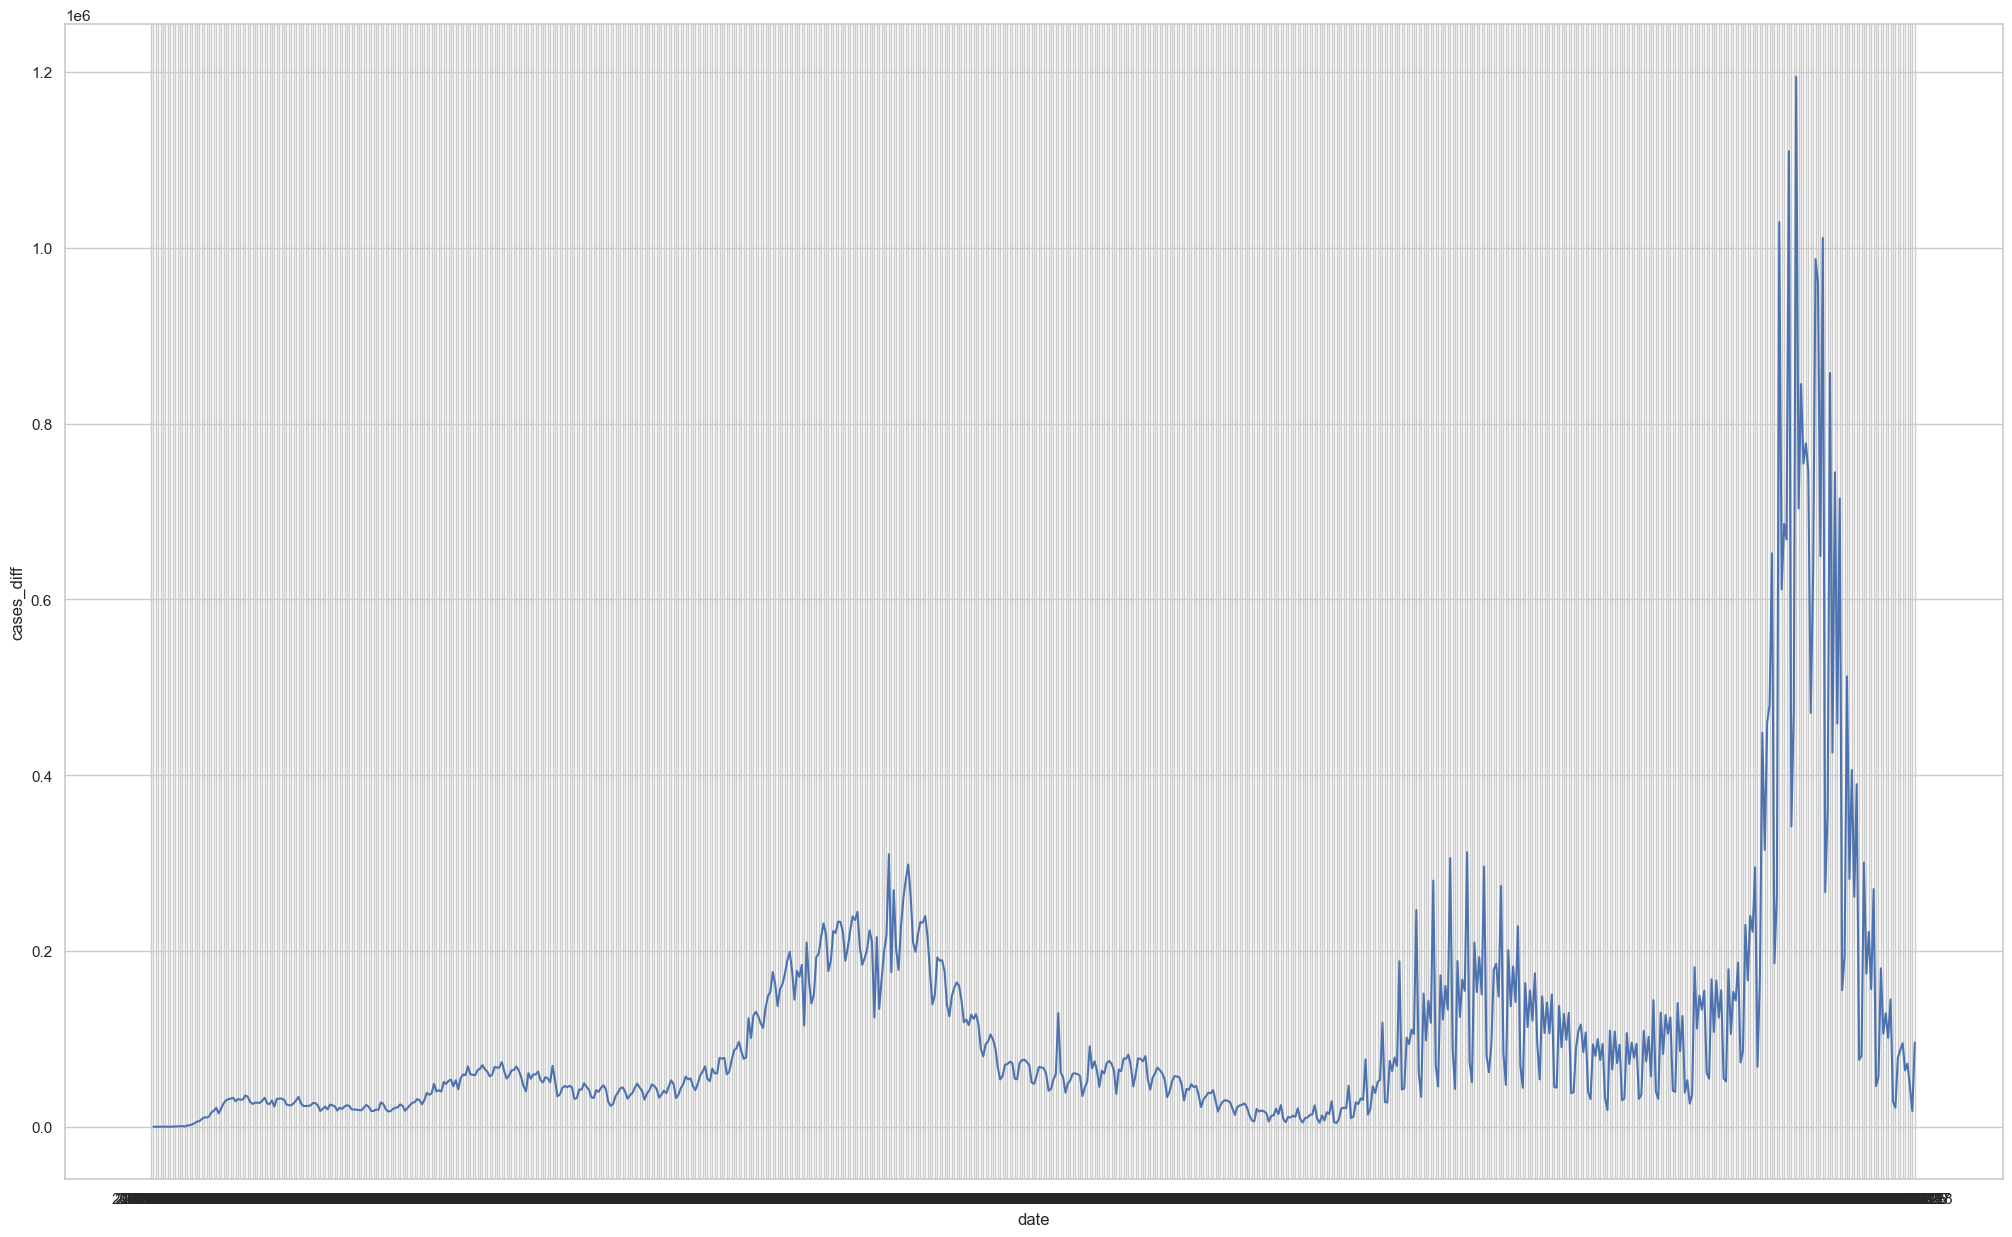

In [58]:
plt.figure(figsize=(25, 15))
sns.lineplot(x="date", y="cases_diff", data=data)
plt.show()

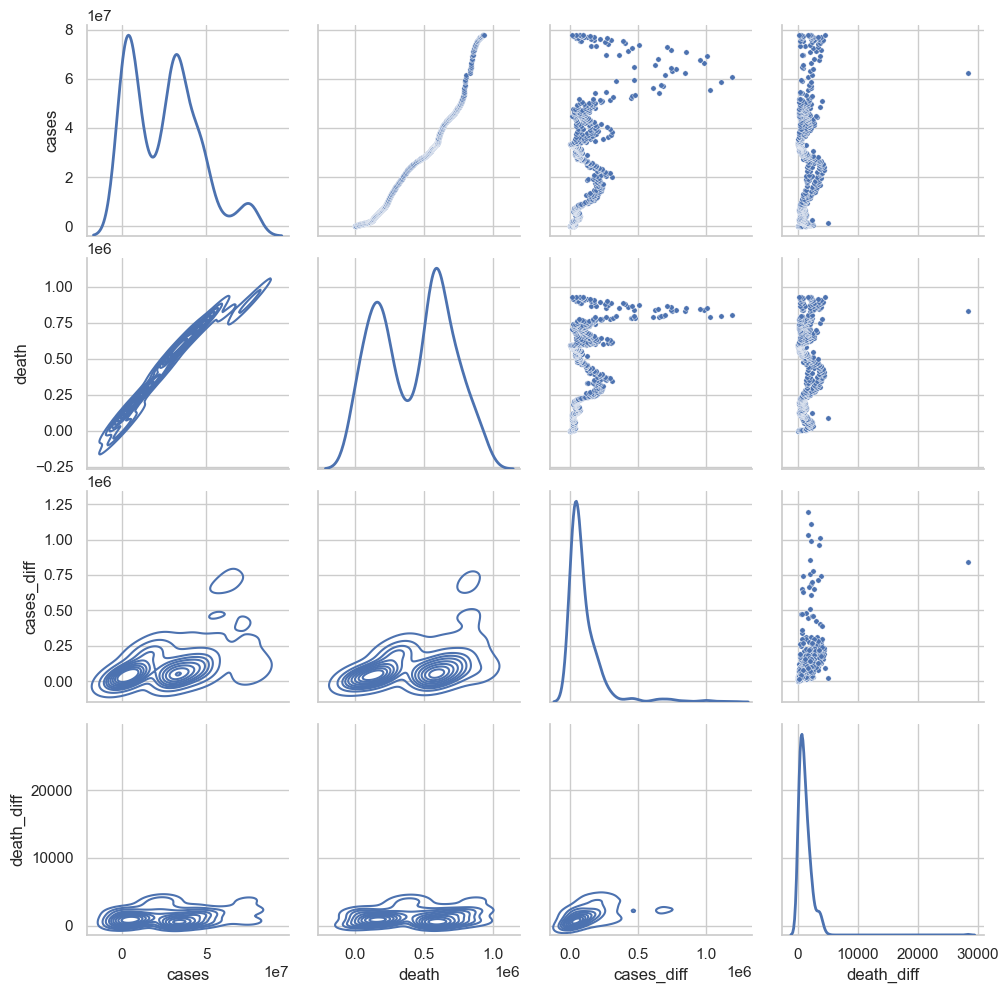

In [61]:
g = sns.PairGrid(data, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [45]:
files = [
    "spring1.csv",
    "summer1.csv",
    "fall1.csv",
    "winter1.csv",
    "spring2.csv",
    "summer2.csv",
    "fall2.csv",
    "winter2.csv",
]

data = pd.concat([pd.read_csv(f"data/{file}") for file in files], ignore_index=True)
data = data.sort_values(by="date")
data.set_index("id", inplace=True)

In [46]:
cols = ["date", "abbr", "cases", "death"]
df = data[cols]

In [47]:
# show max cases and death for each state
max_death = df.groupby("abbr").max().sort_values(by="death", ascending=False)

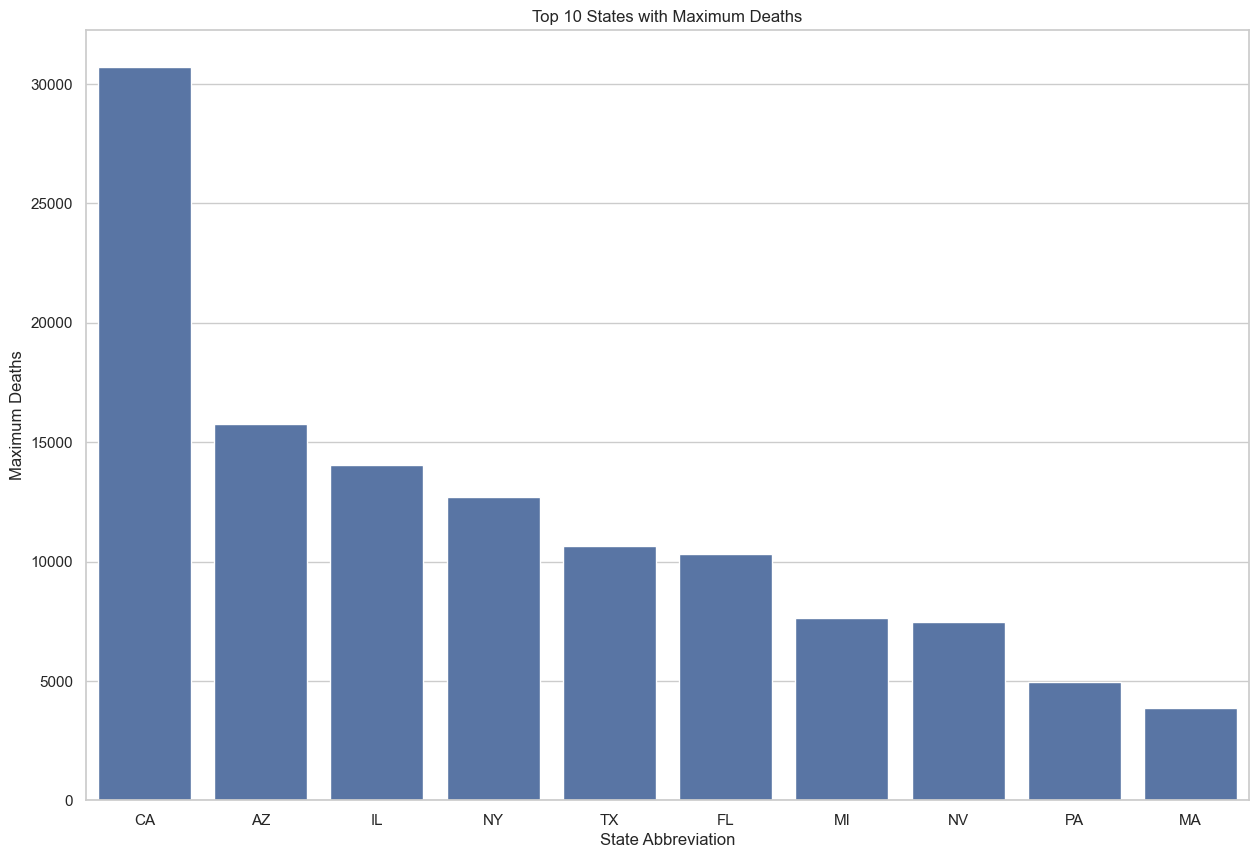

In [48]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.barplot(x=max_death.index[:10], y="death", data=max_death[:10])
plt.xlabel("State Abbreviation")
plt.ylabel("Maximum Deaths")
plt.title("Top 10 States with Maximum Deaths")
plt.show()

In [49]:
# root = Path.ROOT.value
# Image(f"{root}/docs/images/confirm_data_is_clean.png")